Get dataset from kaggle

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d aneerbanchakraborty/face-mask-detection-data

 99% 126M/127M [00:01<00:00, 89.0MB/s]
100% 127M/127M [00:01<00:00, 70.2MB/s]


In [4]:
from zipfile import ZipFile
dataset='/content/face-mask-detection-data.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


Import librares

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from PIL import Image


In [7]:
mask=os.listdir('/content/with_mask')
print(mask[0:6])
print(mask[-6:])

['image1,762.jpg', 'image233.jpg', 'image33.jpg', 'image685.jpg', 'image293.jpg', 'image730.jpg']
['image255.jpg', 'image1,617.jpg', 'image1,194.jpg', 'image1,453.jpg', 'image1,837.jpg', 'image532.jpg']


In [8]:
no_mask=os.listdir('/content/without_mask')
print(no_mask[0:6])
print(no_mask[-6:])

['Faceimg1,083.jpg', 'Faceimg536.jpg', 'Faceimg622.jpg', 'Faceimg437.jpg', 'Faceimg1,894.jpg', 'Faceimg1,838.jpg']
['Faceimg1,856.jpg', 'Faceimg1,097.jpg', 'Faceimg1,356.jpg', 'Faceimg867.jpg', 'Faceimg1,815.jpg', 'Faceimg648.jpg']


In [9]:
print('number of with mask images',len(mask))
print('number of without mask images',len(no_mask))


number of with mask images 1915
number of without mask images 1918


In [13]:
mask_lables=[1]*1915
no_mask_lables=[0]*1918
print(mask_lables[0:5])
print(no_mask_lables[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(mask_lables))
print(len(no_mask_lables))

1915
1918


In [15]:
lables=mask_lables+no_mask_lables
print(len(lables))
print(lables[0:7])
print(lables[-6:])

3833
[1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0]


Plotting the image

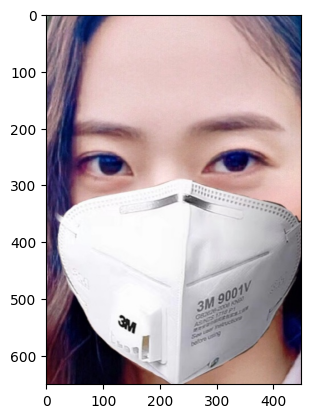

In [16]:
#plotting with mask
img=plimg.imread('/content/with_mask/image1,008.jpg')
plotting_image=plt.imshow(img)
plt.show()

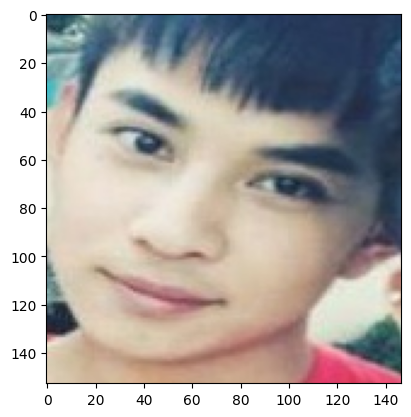

In [20]:
#plotting no mask
img=plimg.imread('/content/without_mask/Faceimg1,014.jpg')
plotting_image=plt.imshow(img)
plt.show()

List of converted Images

In [22]:
mask_path='/content/with_mask/'
All=[]
for img_file in mask:
  image=Image.open(mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  All.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
no_mask_path='/content/without_mask/'
for img_file in no_mask:
  image=Image.open(no_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  All.append(image)

In [24]:
print(type(All))
print (len(All))
print(All[0])


<class 'list'>
3833
[[[121 137 163]
  [121 138 164]
  [120 137 164]
  ...
  [138 150 162]
  [136 148 160]
  [135 147 159]]

 [[120 137 164]
  [122 138 166]
  [120 138 165]
  ...
  [137 149 161]
  [136 148 160]
  [135 147 159]]

 [[120 137 166]
  [120 137 166]
  [119 138 166]
  ...
  [137 149 161]
  [136 148 160]
  [136 148 160]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [25]:
print(type(All[0]))
print(All[0].shape)
print(type(All))
print(type(lables))

<class 'numpy.ndarray'>
(128, 128, 3)
<class 'list'>
<class 'list'>


Convert list to numpy Arr

In [26]:
X=np.array(All)
Y=np.array(lables)
print(type(X))
print(type(Y))
print('x shape is',X.shape)
print('y shape is',Y.shape)
print(X)
print(Y)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
x shape is (3833, 128, 128, 3)
y shape is (3833,)
[[[[121 137 163]
   [121 138 164]
   [120 137 164]
   ...
   [138 150 162]
   [136 148 160]
   [135 147 159]]

  [[120 137 164]
   [122 138 166]
   [120 138 165]
   ...
   [137 149 161]
   [136 148 160]
   [135 147 159]]

  [[120 137 166]
   [120 137 166]
   [119 138 166]
   ...
   [137 149 161]
   [136 148 160]
   [136 148 160]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 33  36  43]
   [ 34  37  44]
   [ 36  39  46]
   ...
   [ 46  38  51]
   [ 47  39  51]
   [ 49  41  52]]

  [[ 35  38  45]
   [ 36  39  46]
   [ 37  40  48]
   ...
   [ 47  39  52]
   [ 48  40  52]
   [ 49  41  52]]

  [[ 

In [27]:
print(X.shape)
print(Y.shape)


(3833, 128, 128, 3)
(3833,)


Splitting the data

In [28]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(3833, 128, 128, 3) (3066, 128, 128, 3) (767, 128, 128, 3)


Scale the data

In [30]:
X_train_scale=X_train/255
X_test_scale=X_test/255

In [31]:
 X_train[0]

array([[[ 42,  42,  42],
        [ 42,  42,  42],
        [ 40,  40,  40],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[ 41,  41,  41],
        [ 41,  41,  41],
        [ 38,  38,  38],
        ...,
        [ 39,  39,  39],
        [ 39,  39,  39],
        [ 39,  39,  39]],

       [[ 37,  37,  37],
        [ 37,  37,  37],
        [ 35,  35,  35],
        ...,
        [ 46,  46,  46],
        [ 46,  46,  46],
        [ 46,  46,  46]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [32]:
X_train_scale[0]

array([[[0.16470588, 0.16470588, 0.16470588],
        [0.16470588, 0.16470588, 0.16470588],
        [0.15686275, 0.15686275, 0.15686275],
        ...,
        [0.14117647, 0.14117647, 0.14117647],
        [0.14117647, 0.14117647, 0.14117647],
        [0.14117647, 0.14117647, 0.14117647]],

       [[0.16078431, 0.16078431, 0.16078431],
        [0.16078431, 0.16078431, 0.16078431],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.15294118, 0.15294118, 0.15294118],
        [0.15294118, 0.15294118, 0.15294118],
        [0.15294118, 0.15294118, 0.15294118]],

       [[0.14509804, 0.14509804, 0.14509804],
        [0.14509804, 0.14509804, 0.14509804],
        [0.1372549 , 0.1372549 , 0.1372549 ],
        ...,
        [0.18039216, 0.18039216, 0.18039216],
        [0.18039216, 0.18039216, 0.18039216],
        [0.18039216, 0.18039216, 0.18039216]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

CNN building

In [33]:
import tensorflow as tf
from tensorflow import keras

In [52]:
classes=2
model= keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(classes,activation='sigmoid'))

Compile CNN

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Train CNN

In [36]:
#history=model.fit(X_train_scale,Y_train,validation_split=0.1,epochs=5)
history = model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
87/87 [==============================] - 61s 667ms/step - loss: 0.4313 - accuracy: 0.8039 - val_loss: 0.1685 - val_accuracy: 0.9414
Epoch 2/10
87/87 [==============================] - 60s 686ms/step - loss: 0.2286 - accuracy: 0.9224 - val_loss: 0.2072 - val_accuracy: 0.9349
Epoch 3/10
87/87 [==============================] - 62s 715ms/step - loss: 0.1982 - accuracy: 0.9337 - val_loss: 0.1365 - val_accuracy: 0.9609
Epoch 4/10
87/87 [==============================] - 59s 679ms/step - loss: 0.1704 - accuracy: 0.9416 - val_loss: 0.1561 - val_accuracy: 0.9609
Epoch 5/10
87/87 [==============================] - 59s 676ms/step - loss: 0.1340 - accuracy: 0.9529 - val_loss: 0.1499 - val_accuracy: 0.9577
Epoch 6/10
87/87 [==============================] - 59s 673ms/step - loss: 0.1219 - accuracy: 0.9565 - val_loss: 0.1441 - val_accuracy: 0.9577
Epoch 7/10
87/87 [==============================] - 60s 683ms/step - loss: 0.1075 - accuracy: 0.9648 - val_loss: 0.1304 - val_accuracy: 0.9674

Model Evaluation

In [37]:
loss,accuracy=model.evaluate(X_test_scale,Y_test)
print('Accuracy Test',accuracy)

24/24 [==============================] - 4s 187ms/step - loss: 0.2254 - accuracy: 0.9531
Accuracy Test 0.9530639052391052


Prediction


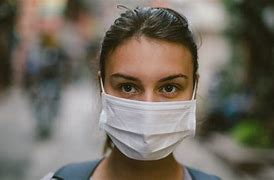

1/1 [==============================] - 0s 107ms/step
wearing mask


In [56]:

#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
input_img = cv2.imread('/content/download.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(input_img)

input_img_resize=cv2.resize(input_img,(128,128))
input_img_scale=input_img_resize/255
input_img_reshape=np.reshape(input_img_scale,[1,128,128,3])
input_prediction=model.predict(input_img_reshape)


if input_prediction_lable ==1:
  print('wearing mask')
else:
  print('not wearing mask')




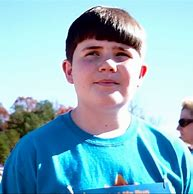

1/1 [==============================] - 0s 32ms/step
not wearing mask


In [55]:
#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
input_img = cv2.imread('/content/OIP (2).jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(input_img)

input_img_resize=cv2.resize(input_img,(128,128))
input_img_scale=input_img_resize/255
input_img_reshape=np.reshape(input_img_scale,[1,128,128,3])
input_prediction=model.predict(input_img_reshape)

if input_prediction_lable ==0:
  print('wearing mask')
else:
  print('not wearing mask')
